<a href="https://colab.research.google.com/github/Rupesh0Poudel/Numerical_Introductory_Seminar/blob/main/Stock_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
apple = yf.Ticker("APPL")
amazon = yf.Ticker("AMZN")
tesla = yf.Ticker("TSLA")
microsoft = yf.Ticker("MSFT")
google = yf.Ticker("GOOG")


In [6]:
#print(apple.info)
df = yf.download("AAPL", start = "2020-1-1", end="2021-11-30")
#print(df.head)



[*********************100%***********************]  1 of 1 completed


In [ ]:
print(df.tail)

<bound method NDFrame.tail of              Open   High    Low  Close  Adj Close   Volume
Date                                                      
2019-06-24   7.20   7.22   7.10   7.10       7.10  3541100
2019-06-25   7.10   7.16   7.06   7.12       7.12  4534700
2019-06-26   7.33   7.40   7.29   7.37       7.37  4736100
2019-06-27   7.53   7.58   7.46   7.54       7.54  7590400
2019-06-28   7.71   7.77   7.58   7.63       7.63  7631800
...           ...    ...    ...    ...        ...      ...
2022-01-10  14.09  14.12  13.66  13.88      13.88  7580700
2022-01-11  13.91  14.14  13.86  14.13      14.13  3529300
2022-01-12  14.01  14.07  13.92  14.01      14.01  3013600
2022-01-13  13.89  14.08  13.83  13.85      13.85  3433800
2022-01-14  13.52  13.79  13.51  13.79      13.79  3061100

[648 rows x 6 columns]>


In [7]:
df.head()
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
adj_close= df['Adj Close']
adj_close.tail()

Date
2021-11-22    161.020004
2021-11-23    161.410004
2021-11-24    161.940002
2021-11-26    156.809998
2021-11-29    160.240005
Name: Adj Close, dtype: float64

In [9]:
returns = adj_close.pct_change()

print(len(returns))
returns.head()

482


Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
Name: Adj Close, dtype: float64

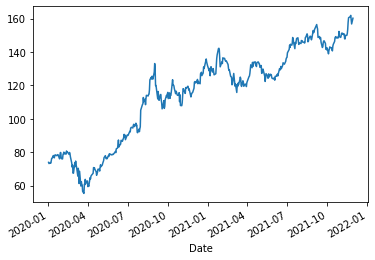

In [10]:
adj_close.plot()

In [11]:
returns

Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
                ...   
2021-11-22    0.002927
2021-11-23    0.002422
2021-11-24    0.003284
2021-11-26   -0.031678
2021-11-29    0.021874
Name: Adj Close, Length: 482, dtype: float64

In [12]:
returns
df_new = returns[1:482]
df_new

Date
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
2020-01-09    0.021241
                ...   
2021-11-22    0.002927
2021-11-23    0.002422
2021-11-24    0.003284
2021-11-26   -0.031678
2021-11-29    0.021874
Name: Adj Close, Length: 481, dtype: float64

In [13]:
last_price = adj_close[-1]
last_price

160.24000549316406

We start with 1000 or 10000 simulation. We will try to draw the path for 252 trading days. To store the results of the simulation, pandas' dataframe was created.

In [14]:
trials = 10000
num_days = 252
simulation_df = pd.DataFrame()

For Trial = 1, the first entry of the first for loop, we start with our volatility we calculated. Our price_series for the new trial is now blank. We calculate single instance of how a price might evolve. For the second till the desired instance, we calculate, in the second for loop, all the outputs for the first trial. that completes our first trial. 
The loop goes on till the desired trial is reached, and the simulated_df now consists a matrix of all trials and price paths in each trial.   

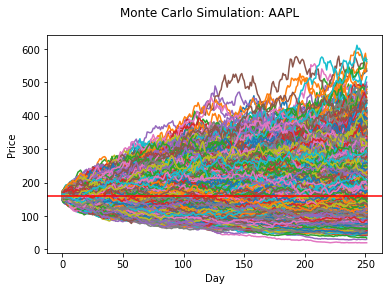

In [15]:
for x in range(trials):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series
    
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: AAPL')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()
# code copied from/ inspired by youtube channel "codebliss"

In [16]:
simulation_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,159.145609,162.321151,162.529838,159.502449,154.351292,155.883351,157.777710,160.931156,155.011435,156.556476,154.659805,163.254772,155.654224,153.512903,155.055825,162.524612,167.186859,163.233038,157.241941,163.259003,164.518519,160.576276,167.952639,158.663693,163.593402,157.837690,166.092201,161.617211,166.498960,152.969097,160.626406,160.283140,157.026831,157.040946,153.603004,163.158131,156.515072,162.537369,167.697720,154.650121,...,162.670876,161.088038,162.764416,161.033266,155.934549,166.282998,162.539630,151.721581,153.216763,159.633843,164.261879,164.276814,156.141992,159.096135,162.212404,160.935935,156.718565,166.117466,165.796166,158.309096,163.278608,159.768899,157.167781,156.626472,156.659521,170.649114,164.158903,162.195080,156.795193,163.430056,160.436349,160.564610,159.726793,161.488829,161.787528,156.662826,155.365724,158.974002,160.616198,165.806171
1,155.707397,154.037509,166.642659,158.352652,154.185854,158.899329,149.201806,158.949023,157.108392,160.041059,153.652039,163.367979,152.697332,152.400841,151.912856,164.850367,165.925566,160.559850,156.094395,171.180364,168.629477,163.056812,174.050270,155.675315,164.716037,158.622729,167.841342,158.559944,166.034209,148.048275,160.329290,157.867910,156.103695,157.812412,154.888844,164.276275,159.762938,163.042642,162.699579,150.013671,...,158.240250,161.257826,164.154217,167.590055,153.158315,171.418432,166.775337,146.682578,148.268452,158.785625,162.029014,161.037612,154.860101,157.419653,159.140544,163.473004,159.764830,163.333019,165.393256,165.142135,165.556117,161.536812,161.213669,153.742385,157.755642,168.822449,161.448738,166.912982,157.125749,167.166057,155.307856,158.722205,153.605683,169.373310,161.986014,149.630388,158.688856,154.549549,163.452950,166.205330
2,148.078814,151.835365,166.377389,157.981148,155.685767,159.908294,145.889923,161.356427,157.673152,158.125430,153.442937,162.617055,151.405459,154.850263,149.472996,158.739689,164.883591,159.050397,157.146534,172.269142,167.362973,164.200346,182.019944,151.883355,166.948326,161.569651,163.238146,163.349563,169.749261,140.088019,155.985429,163.822276,152.339634,164.291467,149.908413,156.558612,163.990981,168.703492,164.133475,148.900246,...,153.074964,163.308925,169.430079,169.329349,147.623355,169.643954,171.396963,155.207005,147.346527,158.460020,159.636273,160.777717,149.973295,162.078958,157.562896,164.287920,157.768517,156.460932,162.743706,166.492952,165.430464,158.825278,164.408187,162.248975,155.533412,170.181940,156.831143,166.711475,151.979228,164.972734,156.484351,162.378663,156.462757,176.565957,157.658559,153.924858,153.953393,152.099871,159.449764,162.012046
3,152.755409,148.422504,167.252682,158.944956,156.638389,158.508845,145.410434,164.536402,165.056198,152.925279,160.315484,162.558266,157.148616,151.782489,152.446454,162.755700,169.040007,160.953723,154.840491,173.595744,173.615108,164.432313,178.252003,150.307902,167.459424,165.360911,165.351978,163.251450,169.608949,143.195362,151.316308,175.985242,154.504025,165.915707,156.224575,156.212191,164.724523,170.912557,161.913784,149.445318,...,153.162752,157.176256,170.627696,171.709182,145.520725,169.617842,166.458874,151.677271,151.464002,160.497039,165.921947,162.810150,150.150407,156.742951,154.316464,165.330948,156.827586,158.790192,161.742378,166.352041,163.697041,153.102845,166.580323,162.415132,154.397616,165.977889,148.644886,167.015844,153.155014,164.729360,157.167324,155.359782,148.792977,173.709471,158.962889,156.591192,156.730796,154.534330,163.624397,157.681170
4,149.227987,142.831105,175.429768,157.626505,148.600538,155.669320,143.822034,164.369312,169.175135,156.302133,164.564496,159.832569,151.331

In [17]:
final = simulation_df.iloc[-1]
final

0        69.946771
1       210.559098
2       114.240556
3       137.757821
4        91.524211
           ...    
9995    159.908612
9996    196.023116
9997    103.073741
9998    223.133118
9999    291.197989
Name: 251, Length: 10000, dtype: float64

In [18]:
final.max()

568.5300120697977

In [19]:
final.min()

20.08067543462071

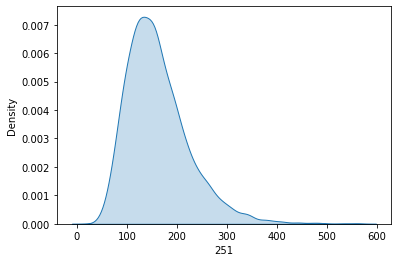

In [22]:
#kdeplot using seaborn library
sns.kdeplot(final, shade = True)


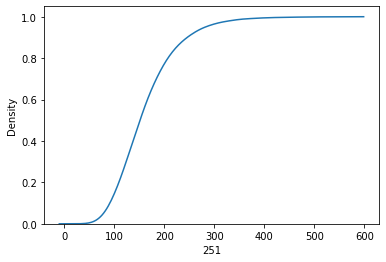

In [23]:

#for cdf instead of usual pdf, use this instead
sns.kdeplot(final, cumulative=True)

(array([2.000e+00, 5.430e+02, 2.276e+03, 2.863e+03, 2.128e+03, 1.128e+03,
        5.830e+02, 2.580e+02, 1.150e+02, 4.800e+01, 4.700e+01, 6.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]),
 array([  0,  40,  80, 120, 160, 200, 240, 280, 320, 360, 400, 480, 520,
        560, 600, 640, 680, 720]),
 <a list of 17 Patch objects>)

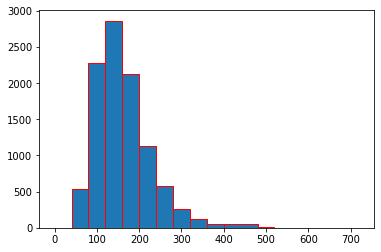

In [ ]:
#bins_desired = [0,80,160,240,320,400,480,560,640,720]
bins_desired = [0,40,80,120,160,200,240,280,320,360,400,480, 520, 560, 600, 640, 680, 720]

plt.hist(final, bins = bins_desired, edgecolor = 'red')

In [ ]:
counter_less140 = final[final<last_price]
counter_less140
prob = len(counter_less140) / trials 
print(prob)

0.57


In [ ]:
time_value = last_price* 1.02
print(len(final[final<time_value])/trials)

0.5924


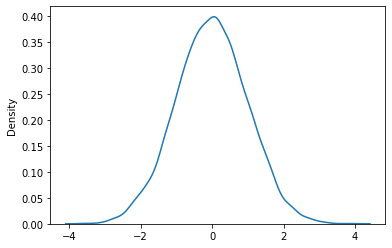

In [25]:
#Box Müller Method
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(521)
U1 = np.random.uniform(size = 10000)
U2 = np.random.uniform(size = 10000)
R = np.sqrt(-2 * np.log(U1))
Theta = 2 * np.pi * U2
X = R * np.cos(Theta)
Y = R * np.sin(Theta)
#sns.kdeplot(X)
#sns.kdeplot(Y)
fig,(ax1,ax2) = plt.subplots(1,2)
temp = ax1.hist(X)
ax1.set_title("X")
temp = ax2.hist(Y)
ax2.set_title("Y")
plt.show()

In [ ]:

from itertools import zip_longest
from math import pi, sqrt, factorial
from typing import List, Union
import numpy as np


class InverseCDF:
    def __init__(self, degree: int) -> None:
        """
        Store Taylor series coefficients of erfinv
        :param degree: highest power of the Taylor series (one less than the number of terms due to constant term)
        """
        self.taylor_coeffs = self.get_taylor_coeffs(n_terms=degree + 1)

    def update_P(self, P: List[int], n: int) -> List[int]:
        """
        Update polynomial for each term of Taylor series approximation of erfinv
        :param P: polynomial of previous power (one less than current power)
        :param n: power of current term
        :return: polynomial of current power term
        """
        EP = [0] + P
        two_nEP = [2 * n * coeff for coeff in EP]
        dP = [power * coeff for power, coeff in enumerate(P)][1:]
        updated_P = [two_nEP_coeff + dP_coeff for two_nEP_coeff, dP_coeff in zip_longest(two_nEP, dP, fillvalue=0)]
        return updated_P

    def get_taylor_coeffs(self, n_terms: int) -> List[float]:
        """
        Get coefficients of Taylor series approximation for erfinv (up to specified number of terms)
        :param n_terms: number of terms of Taylor series
        :return: list of Taylor series coefficients matching number of terms
        """
        taylor_coeffs = [0, sqrt(pi) / 2]  # First two coefficients

        if n_terms <= 2:
            return taylor_coeffs[:n_terms]
        else:
            P = [0, 2]  # Polynomial of second derivative
            dE = sqrt(pi) / 2  # First derivative at x = 0

            # Find Taylor coefficient for each term from x^2 onwards
            for n in range(2, n_terms):
                P_const = P[0]
                taylor_coeff = (dE ** n * P_const) / factorial(n)
                P = self.update_P(P, n)
                taylor_coeffs.append(taylor_coeff)
            return taylor_coeffs

    def calculate_sample(self, A: Union[float, np.array]) -> Union[float, np.array]:
        """
        Return Gaussian sample(s) from sampled left-side area(s)
        :param A: sampled left-side area(s), can be a single float or a numpy float array
        :return: Gaussian sample(s) from applying inverse CDF to sampled area(s), can be single float or numpy float array
        """
        sample = sqrt(2) * sum(coeff * (2*A-1)**power for power, coeff in enumerate(self.taylor_coeffs))
        return sample

(array([ 4., 15.,  6.,  5., 10.,  5., 10., 16., 13., 15., 18., 15., 23.,
        22., 29., 32., 35., 42., 39., 45., 40., 39., 32., 31., 42., 42.,
        40., 40., 33., 28., 28., 24., 21., 21., 24., 20., 16., 18.,  6.,
         6.,  8.,  9., 12.,  7., 14.]),
 array([-2.27705155, -2.17581327, -2.07457499, -1.97333671, -1.87209843,
        -1.77086015, -1.66962187, -1.56838359, -1.46714532, -1.36590704,
        -1.26466876, -1.16343048, -1.0621922 , -0.96095392, -0.85971564,
        -0.75847736, -0.65723908, -0.5560008 , -0.45476252, -0.35352424,
        -0.25228596, -0.15104769, -0.04980941,  0.05142887,  0.15266715,
         0.25390543,  0.35514371,  0.45638199,  0.55762027,  0.65885855,
         0.76009683,  0.86133511,  0.96257339,  1.06381167,  1.16504994,
         1.26628822,  1.3675265 ,  1.46876478,  1.57000306,  1.67124134,
         1.77247962,  1.8737179 ,  1.97495618,  2.07619446,  2.17743274,
         2.27867102]),
 <a list of 45 Patch objects>)

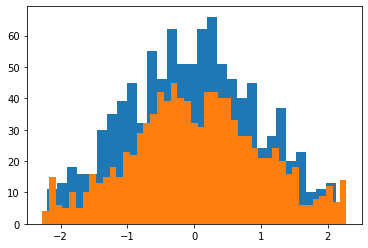

In [ ]:
# Step 1: Sample 1000 independent left-side areas
# (independently for x and y coordinates)
area_xs = np.random.RandomState(seed=42).uniform(size=1000)
area_ys = np.random.RandomState(seed=24).uniform(size=1000)

# Step 2: Apply 21-degree Taylor series approximation of inverse Gaussian CDF
invcdf21 = InverseCDF(degree=21)

# Step 3: Generate Gaussian samples for x and y coordinates
gaussian_xs = invcdf21.calculate_sample(area_xs) # array([-0.31985238,  1.6399258 ,  0.61885465, ...])
gaussian_ys = invcdf21.calculate_sample(area_ys) # array([ 1.72888778,  0.522997633,  2.27867102, ...])
plt.hist(gaussian_xs, bins=30)
plt.hist(gaussian_ys, bins = 45)

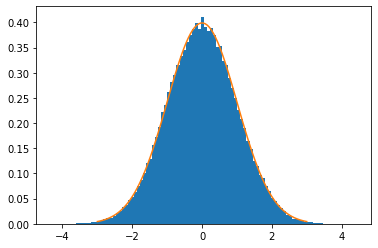

In [ ]:
#marsaglia polar method youtube channel StatMonteCarlo

import numpy as np
import numpy.random as rd
from scipy import stats
import matplotlib.pyplot as plt

def f(u1, R_sq):
  return u1 * np.sqrt(-2*np.log(R_sq) / R_sq)

def sim(N):
  out = np.zeros(N)
  for i in range(N):
    R_sq = 2
    while R_sq > 1:
      u1 = rd.uniform(-1,1)
      u2 = rd.uniform(-1,1)
      R_sq = u1**2 + u2**2
    X = f(u1, R_sq)
    out[i] = X
  return out


#plot
X = sim(10**5)
plt.figure()
plt.hist(X, bins=100, density=True)
xx=np.linspace(-3,3,100)
plt.plot(xx,stats.norm.pdf(xx))


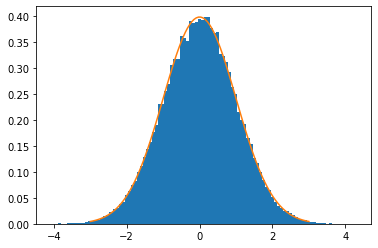

In [ ]:
#Box Müller Method _ Youtube channel StatMonteCarlo

import numpy as np
import numpy.random as rd
from scipy import stats
import matplotlib.pyplot as plt

def fcos(theta, E):
  #return [np.cos(theta), np.sin(theta)] * np.sqrt(2*E)
  return np.cos(theta) * np.sqrt(2*E)
  

def BoxMuller(N, mu = 0, sigma = 1 ):
  out = np.zeros(N)
  for j in range(N):
    theta = rd.uniform(low = 0, high = 2*np.pi, size = 1)
    E = rd.exponential(scale = 1/1, size = 1)
    Y = fcos(theta,E)
    out[j] = mu + Y* sigma
  return out
plt.figure()
Y = BoxMuller(10**5)
plt.hist(Y, bins=100, density=True)
xd=np.linspace(-3,3,100)
plt.plot(xd,stats.norm.pdf(xd))
#for distribution with mean unequal to 0 and sigma unequal to 1, run the phi module
#and use the following code to plot the outline instead for mean 5 and sigma 2
#plt.plot(xd,phi(xd,5,2))


In [ ]:
#characteristics function for arbitrary mu and sigma for normal distribution

def phi(X, mu, sigma):
  return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

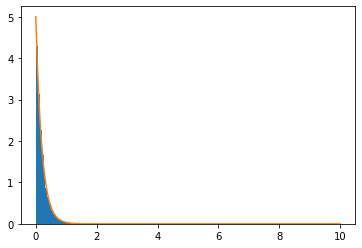

In [ ]:
#Linear Congruential Generator

def LCG(N,S):
  a = 7**5
  M = 2**31-1

  def fn(S):
    return (a*S) % M

  U = []

  for k in range(N):
    S = fn(S)
    U += [S/M]

  return U

U = LCG(10**6, 123)

import matplotlib.pyplot as plt
import numpy as np

X = -np.log(U)/5

plt.figure ()
plt.hist(X, bins = 50, density=True)

def f(x):
  return 5* np.exp(-x*5)

xx = np.linspace (0,10,200)

plt.plot(xx, f(xx))


(array([1.00515042, 0.99472042, 0.99209042, 0.99936042, 1.00343042,
        1.00264042, 0.99967042, 0.99622042, 1.00273042, 1.00399042]),
 array([1.29453838e-07, 1.00000088e-01, 2.00000046e-01, 3.00000004e-01,
        3.99999962e-01, 4.99999920e-01, 5.99999878e-01, 6.99999836e-01,
        7.99999794e-01, 8.99999752e-01, 9.99999710e-01]),
 <a list of 10 Patch objects>)

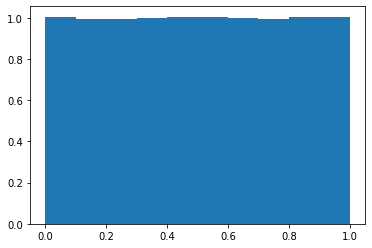

In [ ]:

plt.hist(U, bins = 10, density=True)


In [ ]:
#fibonacci method for uniformly distributed random number


# parameter settings
nn   = 18
a    = 1366
b    = 150889
M    = 714025
seed = 1234567
n    = 10000
yy   = c(seed)
i    = 2

# Main computation
while i <= nn:
    yy = cbind(yy, ((a * yy[i - 1] + b)%%M))
    i  = i + 1

y = yy/M
i = 19

while i <= n + 18:
    zeta = y[i - 17] - y[i - 5]
    if zeta < 0:
        zeta = zeta + 1
    
    y[i] = zeta
    i = i + 1

y   = y[19:n + 18]
n1  = n - 2
n2  = n - 1
dat = c(y[1:n1], y[2:n2])

# Plot
plot(y[1:n1], y[2:n2], type = "p", pch = 20, xlab = expression(U[i - 1]), ylab = expression(U[i]), 
    xaxp = c(0, 1, 10), yaxp = c(0, 1, 10), xlim = c(0, 1), ylim = c(0, 1))


In [ ]:
# Inverse method
# Ndtri : Returns the argument x for which the area under the Gaussian probability density function (integrated from minus infinity to x) is equal to y.

from scipy.special import ndtri
ndtri(0.95)


1.6448536269514722